In [1]:
#Formação Cientista de Dados
#Projeto Final

In [1]:
# Importação das bibliotecas de análise exploratória
import pandas as pd
import numpy as np
import seaborn as srn
import statistics  as sts

In [2]:
#importar dados
dataset = pd.read_csv('Banco de dados.csv', sep=";")
#visulizar
dataset.head()

IDCREDITO  Duracao  HistoricoCredito  Proposito  Valor  Investimentos  \
0          2       48                 2          1   5951              2   
1          3       12                 1          2   2096              2   
2          4       42                 2          3   7882              2   
3          5       24                 3          4   4870              2   
4          6       36                 2          2   9055              1   

   Emprego  TempoParcelamento  EstadoCivil  FiadorTerceiros  ResidenciaDesde  \
0      3.0                  2            1                3              2.0   
1      4.0                  2            4                3              3.0   
2      4.0                  2            4                4              4.0   
3      3.0                  3            4                3              4.0   
4      3.0                  2            4                3              4.0   

   Idade  OutrosFinanciamentos  Habitacao  EmprestimoExistente  Profissao  \
0     22                     3        1.0                    1          4   
1     49                     3        1.0                    1          3   
2     45                     3        2.0                    1          4   
3     53                     3        2.0                    2          4   
4     35                     3        2.0                    1          3   

   Dependentes  SocioEmpresa  Estrangeiro  Status  
0            1             0            0       0  
1            2             0            0       1  
2            2             0            0       1  
3            2             0            0       0  
4            2             1            0       1

In [3]:
# Verificar quantas linhas e colunas existem na base de dados, 1000 linhas e 20 colunas
dataset.shape

(1000, 20)

In [4]:
dataset['Valor'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Valor')

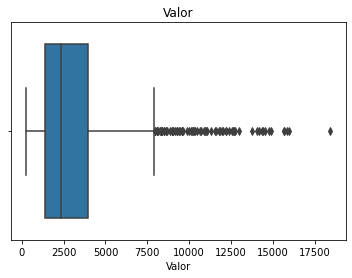

In [5]:
srn.boxplot(dataset['Valor']).set_title('Valor')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Valor')

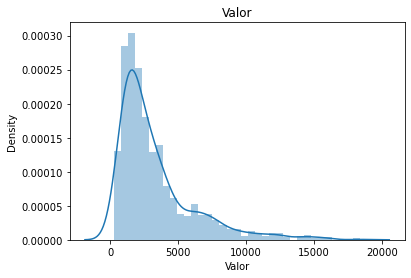

In [6]:
srn.distplot(dataset['Valor']).set_title('Valor')

In [7]:
dataset['Idade'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

In [8]:
#contamos valores NAN
#emprego e #habitacao
dataset.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

In [9]:
#Começando a tratar os dados
#Emprego
#remover nas e substiutir pela moda
dataset['Emprego'].describe()

count    990.000000
mean       2.704040
std        1.130639
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Emprego, dtype: float64

In [10]:
#emprego, falta de padronização e NAs
agrupado = dataset.groupby(['Emprego']).size()
agrupado

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

In [11]:
#preenche NAs com 3 (moda) - utilizando a moda pq sei que é uma variável categórica
dataset['Emprego'].fillna('3', inplace=True)

In [12]:
#verificamos novamente NANs
dataset['Emprego'].isnull().sum()

0

In [13]:
#residencia, falta de padronização e NAs
agrupado2 = dataset.groupby(['ResidenciaDesde']).size()
agrupado2

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

In [14]:
#preenche NAs com 4 (moda) - utilizando a moda pq sei que é uma variável categórica
dataset['ResidenciaDesde'].fillna('4', inplace=True)

In [15]:
#verificamos novamente NANs
dataset['ResidenciaDesde'].isnull().sum()

0

In [16]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['IDCREDITO'],keep=False)]

Empty DataFrame
Columns: [IDCREDITO, Duracao, HistoricoCredito, Proposito, Valor, Investimentos, Emprego, TempoParcelamento, EstadoCivil, FiadorTerceiros, ResidenciaDesde, Idade, OutrosFinanciamentos, Habitacao, EmprestimoExistente, Profissao, Dependentes, SocioEmpresa, Estrangeiro, Status]
Index: []

In [17]:
#outliers em valor, vamos considerar 3 desvios padrão
desv = sts.stdev(dataset['Valor'])
desv

2822.7368759604406

In [18]:
#definir padrão como maior que 3 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Valor'] >=  3 * desv ] 

IDCREDITO  Duracao  HistoricoCredito  Proposito  Valor  Investimentos  \
4            6       36                 2          2   9055              1   
13          19       24                 2          5  12579              2   
49          58       36                 1          1   9566              2   
55          64       48                 4          6  14421              2   
73          79       54                 4          5   9436              1   
..         ...      ...               ...        ...    ...            ...   
906        928       48                 2          5  10297              2   
931        954       36                 2          3  10974              2   
986        896       36                 3          5   8947              1   
989        396       39                 3          2  11760              5   
990        745       39                 1          3  14179              1   

    Emprego  TempoParcelamento  EstadoCivil  FiadorTerceiros ResidenciaDesde  \
4         3                  2            4                3               4   
13        2                  4            1                3               2   
49        3                  2            1                3               2   
55        3                  2            4                3               2   
73        3                  2            4                3               2   
..      ...                ...          ...              ...             ...   
906       4                  4            4                3               4   
931       5                  4            1                3               2   
986       3                  3            4                3               2   
989       4                  2            4                3               3   
990       4                  4            4                3               4   

     Idade  OutrosFinanciamentos  Habitacao  EmprestimoExistente  Profissao  \
4       35                     3        2.0                    1          3   
13      44                     3        2.0                    1          1   
49      31                     2        1.0                    2          4   
55      25                     3        1.0                    1          4   
73      39                     3        1.0                    1          3   
..     ...                   ...        ...                  ...        ...   
906     39                     2        2.0                    3          4   
931     26                     3        1.0                    2          1   
986     31                     2        1.0                    1          1   
989     32                     3        NaN                    1          4   
990     30                     3        NaN                    2          1   

     Dependentes  SocioEmpresa  Estrangeiro  Status  
4              2             1            0       1  
13             1             1            0       0  
49             1             0            0       1  
55             1             1            0       0  
73             2             0            0       1  
..           ...           ...          ...     ...  
906            2             1            0       0  
931            1             1            0       0  
986            2             1            0       1  
989            1             1            0       1  
990            1             1            0       1  

[61 rows x 20 columns]

In [19]:
#vamos atualizar Valor para mediana, calculamos
mediana = sts.median(dataset['Valor'])
mediana

2319.5

In [20]:
#atribumos
dataset.loc[dataset['Valor'] >=  3 * desv, 'Valor'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Valor'] >=  3 * desv ] 

Empty DataFrame
Columns: [IDCREDITO, Duracao, HistoricoCredito, Proposito, Valor, Investimentos, Emprego, TempoParcelamento, EstadoCivil, FiadorTerceiros, ResidenciaDesde, Idade, OutrosFinanciamentos, Habitacao, EmprestimoExistente, Profissao, Dependentes, SocioEmpresa, Estrangeiro, Status]
Index: []

In [21]:
dataset.head()

IDCREDITO  Duracao  HistoricoCredito  Proposito   Valor  Investimentos  \
0          2       48                 2          1  5951.0              2   
1          3       12                 1          2  2096.0              2   
2          4       42                 2          3  7882.0              2   
3          5       24                 3          4  4870.0              2   
4          6       36                 2          2  2319.5              1   

  Emprego  TempoParcelamento  EstadoCivil  FiadorTerceiros ResidenciaDesde  \
0       3                  2            1                3               2   
1       4                  2            4                3               3   
2       4                  2            4                4               4   
3       3                  3            4                3               4   
4       3                  2            4                3               4   

   Idade  OutrosFinanciamentos  Habitacao  EmprestimoExistente  Profissao  \
0     22                     3        1.0                    1          4   
1     49                     3        1.0                    1          3   
2     45                     3        2.0                    1          4   
3     53                     3        2.0                    2          4   
4     35                     3        2.0                    1          3   

   Dependentes  SocioEmpresa  Estrangeiro  Status  
0            1             0            0       0  
1            2             0            0       1  
2            2             0            0       1  
3            2             0            0       0  
4            2             1            0       1

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Valor')

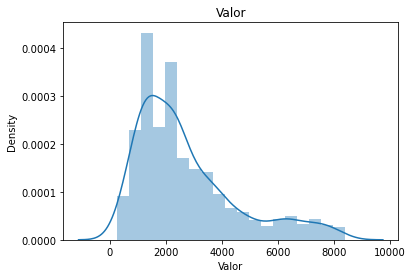

In [22]:
srn.distplot(dataset['Valor']).set_title('Valor')

In [23]:
#profissao, falta de padronização e NAs
agrupado3 = dataset.groupby(['Profissao']).size()
agrupado3

Profissao
1      147
2       22
3      197
4      625
999      9
dtype: int64

In [24]:
#atribuomos 4 (moda)
dataset.loc[dataset['Profissao'].isin( ['999']), 'Profissao'] = 4
agrupado3 = dataset.groupby(['Profissao']).size()
agrupado3

Profissao
1    147
2     22
3    197
4    634
dtype: int64

In [25]:
#Habitacao, falta de padronização e NAs
agrupado4 = dataset.groupby(['Habitacao']).size()
agrupado4

Habitacao
1.0    709
2.0    107
3.0    175
dtype: int64

In [26]:
#preenche NAs com 4 (moda) - utilizando a moda pq sei que é uma variável categórica
dataset['Habitacao'].fillna(1.0, inplace=True)

In [27]:
#verificamos novamente NANs
dataset['Habitacao'].isnull().sum()

0

In [28]:
# Importação das bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Transformando a coluna Status em variável categórica
dataset.loc[dataset['Status'].isin( [0]), 'Status'] = "Nao"
dataset.loc[dataset['Status'].isin( [1]), 'Status'] = "Sim"
agrupado5 = dataset.groupby(['Status']).size()
agrupado5

Status
Nao    300
Sim    700
dtype: int64

In [30]:
previsores = dataset.iloc[:,0:19].values
classe = dataset.iloc[:,19].values

In [31]:
dataset.head()

IDCREDITO  Duracao  HistoricoCredito  Proposito   Valor  Investimentos  \
0          2       48                 2          1  5951.0              2   
1          3       12                 1          2  2096.0              2   
2          4       42                 2          3  7882.0              2   
3          5       24                 3          4  4870.0              2   
4          6       36                 2          2  2319.5              1   

  Emprego  TempoParcelamento  EstadoCivil  FiadorTerceiros ResidenciaDesde  \
0       3                  2            1                3               2   
1       4                  2            4                3               3   
2       4                  2            4                4               4   
3       3                  3            4                3               4   
4       3                  2            4                3               4   

   Idade  OutrosFinanciamentos  Habitacao  EmprestimoExistente  Profissao  \
0     22                     3        1.0                    1          4   
1     49                     3        1.0                    1          3   
2     45                     3        2.0                    1          4   
3     53                     3        2.0                    2          4   
4     35                     3        2.0                    1          3   

   Dependentes  SocioEmpresa  Estrangeiro Status  
0            1             0            0    Nao  
1            2             0            0    Sim  
2            2             0            0    Sim  
3            2             0            0    Nao  
4            2             1            0    Sim

In [32]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [33]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [34]:
# Visualização dos atributos principais
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='auto', random_state=2001083062),
 DecisionTreeClassifier(max_features='auto', random_state=1769404877),
 DecisionTreeClassifier(max_features='auto', random_state=405992624),
 DecisionTreeClassifier(max_features='auto', random_state=2077755179),
 DecisionTreeClassifier(max_features='auto', random_state=2071684586),
 DecisionTreeClassifier(max_features='auto', random_state=1272377129),
 DecisionTreeClassifier(max_features='auto', random_state=20428168),
 DecisionTreeClassifier(max_features='auto', random_state=1950855326),
 DecisionTreeClassifier(max_features='auto', random_state=400280477),
 DecisionTreeClassifier(max_features='auto', random_state=674043332),
 DecisionTreeClassifier(max_features='auto', random_state=41827243),
 DecisionTreeClassifier(max_features='auto', random_state=1485701227),
 DecisionTreeClassifier(max_features='auto', random_state=283439630),
 DecisionTreeClassifier(max_features='auto', random_state=1163216905),
 DecisionTreeC

In [35]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.7833333333333333